# Задача №1
Для цепи Маркова, заданной стохастической матрицей переходов:
1. [x]	нарисовать граф цепи;
2. [x]	проверить выполнение критерия эргодичности;
3. [x]	рассчитать предельные вероятности;
4. [x]	записать предельную матрицу переходов;
5. [x]	провести имитационное моделирование системы, соответствующей рассматриваемой цепи, для этого:
- [x] случайно выбрать начальное состояние;
- [x] случайно разыграть переход в новое состояние, учитывая распределение вероятностей перехода;
- [x] совершить 100 переходов;
- [x] подсчитать число вхождений в каждое из состояний системы;
- [x] повторить эксперимент 20 раз;
- [x] построить «графики» переключений состояний цепи (для наглядности соединяем дискретные точки);
- [x] составить таблицу для сравнения относительных частот наблюдений вхождения в каждое из состояний системы;
- [x] рассчитать исправленные оценки среднеквадратичных отклонений указанных относительных частот.


## Подключение библиотек

In [2]:
import numpy as np
import seaborn as sb
import csv
import pandas as pd
from random import seed
from random import random, randrange
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
import imageio.v2 as imageio

## Матрица переходов

In [3]:
P = np.array([[0.23, 0.16, 0.25, 0.15, 0.21,
                0.19, 0.24, 0.15, 0.22, 0.20,
                0.18, 0.18, 0.20, 0.25, 0.19,
                0.23, 0.24, 0.17, 0.14, 0.22,
                0.16, 0.22, 0.28, 0.14, 0.20]]).reshape((5, 5))

## 1. Отображение графа цепи Маркова

![gr](markov_chain2.gif)

## 2. Проверка выполнения критерия эргодичности

[[0.19693779 0.20755709 0.21029788 0.18170671 0.20350053]]


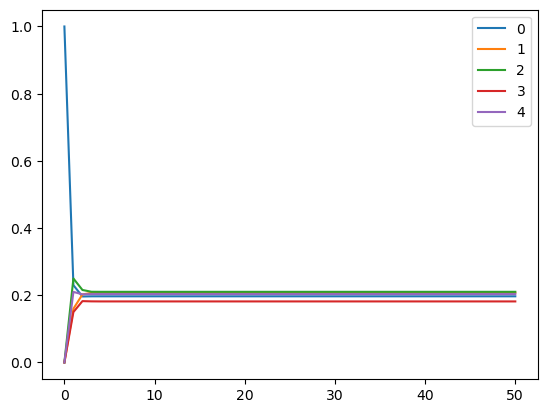

In [4]:
state=np.array([[1.0, 0.0, 0.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0, 0 ,0 , 0, 0]]
for x in range(50):
    state=np.dot(state,P)
    stateHist=np.append(stateHist,state,axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
    if x == 49:
        dfDistrHist.plot()
        print(state)
plt.show()

## 3. Расчёт предельных вероятностей

### Решение СЛАУ

In [5]:
A = np.append(np.transpose(P)-np.identity(5),[[1, 1, 1, 1, 1]],axis=0)
b = np.transpose(np.array([0,0,0,0,0, 1]))

pi = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

### Получение вектора предельных вероятностей $\pi$

In [6]:
pi

array([0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053])

## 4. Предельная матрица переходов

In [7]:
Pn = np.array([[pi] * 5])
Pn

array([[[0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053],
        [0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053],
        [0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053],
        [0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053],
        [0.19693779, 0.20755709, 0.21029788, 0.18170671, 0.20350053]]])

## 5. Имитационное моделирование системы

### Для начала проведем всего 1 эксперимент

In [8]:
#Параметры марковской цепи
# Матрица переходов
Q = P

#Задание количества шагов по цепи
N_steps = 100
node_ind = randrange(5) # случайно выбранное начальное состояние
node_sel = [node_ind] # список вершин, по которым будет проход

dict_states = {i:0 for i in range(5)} # число вхождений в каждое из состояний системы

for i in range(N_steps):
    
    # случайный разыгрыш перехода в новое состояние, учитывая распределение вероятностей перехода 
    temp_ni=np.random.choice(5,p=Q[node_ind]) 
    
    dict_states[temp_ni] = dict_states[temp_ni] + 1
    
    node_sel.append(temp_ni)
    node_ind=temp_ni

### Число вхождений в каждое состояние системы в 1 эксперименте

<BarContainer object of 5 artists>

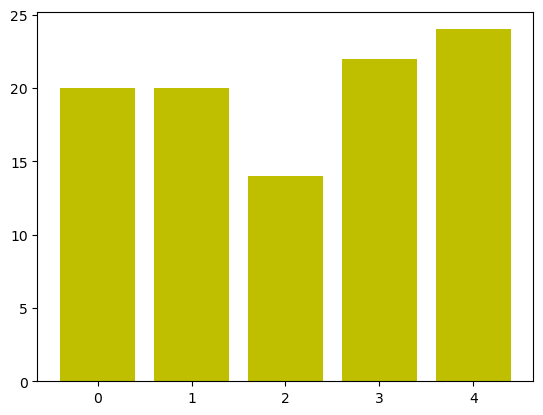

In [9]:
plt.bar(dict_states.keys(), dict_states.values(), color='y')

### Теперь проведем 20 экспериментов

In [10]:
#Параметры марковской цепи
# Матрица переходов
Q = P

exp_20 = [] # список списков значений относительных частот наблюдений вхождения в каждое из состояний системы
node_sel_20 = [] # список списков последовательностей вершин в каждом эксперименте
num_of_states = 5 # количество состояний в системе
num_of_exp = 20

for exp_v in range(num_of_exp):
    #Задание количества шагов по цепи
    N_steps = 100
    node_ind = randrange(num_of_states) # случайно выбранное начальное состояние
    node_sel = [node_ind] # список вершин, по которым будет проход

    dict_states = {i:0 for i in range(num_of_states)} # число вхождений в каждое из состояний системы

    for i in range(N_steps):
    
        # случайный разыгрыш перехода в новое состояние, учитывая распределение вероятностей перехода 
        temp_ni=np.random.choice(num_of_states,p=Q[node_ind]) 
    
        dict_states[temp_ni] = dict_states[temp_ni] + 1
    
        node_sel.append(temp_ni)
        node_ind=temp_ni
        
    arr_d_val = np.array(list(dict_states.values())) / N_steps
    
    exp_20.append(list(arr_d_val))
    node_sel_20.append(node_sel)

## «Графики» переключений состояний цепи (первые 3 эксперимента)

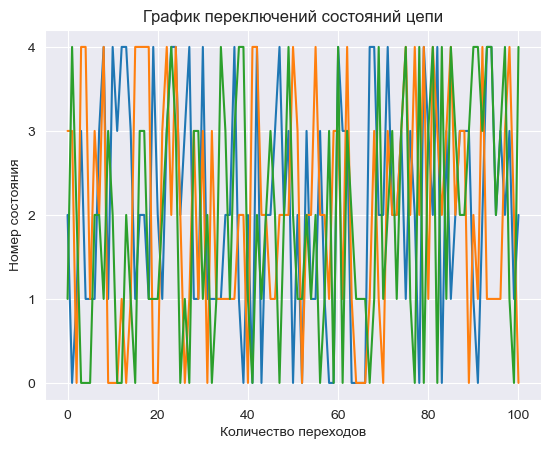

In [12]:
sb.set_style("darkgrid")

plt.xlabel("Количество переходов")
plt.ylabel("Номер состояния")
plt.title("График переключений состояний цепи")
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

data = np.array(node_sel_20)
for i in range(3):
    plt.plot(node_sel_20[i])

plt.yticks([int(i) for i in range(num_of_states)])
plt.show()

### Таблица для сравнения относительных частот наблюдений вхождения в каждое из состояний системы

In [13]:
df = pd.DataFrame(exp_20, columns =['0', '1', '2', '3', '4'])
df

,0,1,2,3,4
0,0.15,0.22,0.22,0.21,0.20
1,0.17,0.23,0.22,0.17,0.21
2,0.19,0.24,0.19,0.19,0.19
3,0.24,0.14,0.26,0.17,0.19
4,0.25,0.32,0.15,0.15,0.13
5,0.15,0.22,0.26,0.18,0.19
6,0.18,0.26,0.22,0.21,0.13
7,0.15,0.23,0.21,0.23,0.18
8,0.18,0.27,0.16,0.20,0.19
9,0.22,0.21,0.19,0.10,0.28


### Исправленные оценки среднеквадратичных отклонений указанных относительных частот

Среднеквадратическое отклонение:

$ S = \sqrt{\frac{\sum_{i=0}^{i = n}(x_i - x_m)^2}{n - 1}} $,

где $x_m$ - среднеарифметическое значение результатов $n$ измерений,
$x_i$ - значение результата в $i$-ом измерении.


In [14]:
df_mean = df.mean()
S = []

for i in range(num_of_states):
    sum_ = np.fabs(sum(np.power((df[str(i)][j] - df_mean[i]), 2) for j in range(num_of_exp)))
    value =  sum_/ (num_of_exp - 1)
    S.append(np.sqrt(value))
    
df_S = pd.DataFrame([S], columns =['0', '1', '2', '3', '4'])
df_S

,0,1,2,3,4
0,0.041023,0.0411,0.042037,0.027625,0.046166


In [17]:
#Параметры марковской цепи
# Состояния
states = [(0, 0),
            (1, 0),
            (2, 0),
            (3, 0),
            (4, 0)]

# Матрица переходов
Q = P

#Задание количества шагов по цепи
N_steps = 100
node_ind = randrange(5)
node_sel = [node_ind]
dict_states = {i:0 for i in range(5)}



for i in range(N_steps):
    
    temp_ni=np.random.choice(5,p=Q[node_ind])
    
    dict_states[temp_ni] = dict_states[temp_ni] + 1
    
    node_sel.append(temp_ni)
    node_ind=temp_ni

# Настройка графа
G = nx.MultiDiGraph()
[G.add_node(s,style='filled',fillcolor='white',shape='circle',fixedsize='true',width=0.5) for s in states]

labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate),len=2)

# Настройка цвета для каждого шага для каждого узла   
for k in range(N_steps):
    for i,n in enumerate(G.nodes(data=True)):
        if i==node_sel[k]:
            n[1]['fillcolor']='blue'
        else:
            n[1]['fillcolor']='white'
    
    A = to_agraph(G)
    A.layout()
    A.draw('src/net_'+str(k)+'.png')

# Создание gif с помощью imageio
images = []
filenames=['src/net_'+str(k)+'.png' for k in range(N_steps)]
for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave('src/markov_chain2.gif', images,fps=3)

![gr](markov_chain2.gif)